In [116]:
#librerias
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import re
import bar_chart_race as bcr
from wordcloud import WordCloud, STOPWORDS

In [117]:
#read Data_Frame
df_ida = pd.read_csv('../db/df_ida.csv')
#Show all columns Data_Frame
pd.set_option('display.max_columns', None)
#Show all rows Data_Frame
#pd.set_option('display.max_rows', None)

#Print Object Data_Frame
df_ida

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Year,Latitude,Longitude
0,2020-08-13T08:00:00.000,0820,THEFT,$500 AND UNDER,STREET,False,1634,16,2020,41.946679,-87.752040
1,2020-08-13T08:00:00.000,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,1424,14,2020,41.903290,-87.670913
2,2020-08-13T08:00:00.000,0820,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,2511,25,2020,41.930950,-87.788569
3,2020-08-13T08:30:00.000,0810,THEFT,OVER $500,STREET,False,312,3,2020,41.774887,-87.625178
4,2020-08-13T08:30:00.000,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,1924,19,2020,41.944513,-87.650601
...,...,...,...,...,...,...,...,...,...,...,...
97854,2022-02-15T23:00:00.000,0810,THEFT,OVER $500,STREET,False,1733,17,2022,41.950285,-87.707174
97855,2022-02-15T23:00:00.000,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,815,8,2022,41.812464,-87.726206
97856,2022-02-15T23:00:00.000,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,1111,11,2022,41.897098,-87.731594
97857,2022-02-15T23:15:00.000,0630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,1413,14,2022,41.923869,-87.707193


In [118]:
#revisamos los tipos de datos del Data frame
print(df_ida.dtypes)

Date                     object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Beat                      int64
District                  int64
Year                      int64
Latitude                float64
Longitude               float64
dtype: object


In [119]:
#to numeric (en dado caso de que las columnas de interés no tengan formato de número)
#num = df_ida.drop(columns = ['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Latitude', 'Longitude'], axis = 1)
#df_ida[num] = df_ida[num].apply(pd.to_numeric, errors = 'coerce')

#Cambiar el indice que organiza el DataFrame
#df_ida = df_ida.set_index('Date')

In [120]:
#modificaciones en el formato de fecha
#df_ida.Date = pd.to_datetime(df_ida.Date)
df_ida["Date"] = pd.to_datetime(df_ida["Date"])

# Tablas

Análisis Inicial del data frame sintetizado en tablas para identificar patrones o aspectos relevantes que contribuyan en el entendimiento del problema. Varias de estas tablas posteriormente servirán como insumo para crear graficas.

In [121]:
#df_ida_mes = df_ida.groupby(by = (['Year', 'Date'])).groupby(pd.Grouper(key="Date", freq="M")).groupby(level=[0]).mean()
df_ida_mes = df_ida.groupby(pd.Grouper(key="Date", freq="M")).size().reset_index(name = 'Events')

In [122]:
#extraer Año y mes
#df_events = df_ida_mes.assign(Month = [df_ida_mes['Date'].dt.month], Year = [df_ida_mes['Date'].dt.year])
df_ida_mes['Month'], df_ida_mes['Year'] =df_ida_mes['Date'].dt.month, df_ida_mes['Date'].dt.year

In [123]:
#cambiar meses por cadena de texto
df_ida_mes['Month'].replace({1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

### Robos totales por mes agrupados por año

In [124]:
#df_ida_mes

In [125]:
#separar por años
#df_2001 = df_ida_mes[(df_ida_mes["Date"] >= "2001-01-31") & (df_ida_mes["Date"] <= "2001-12-31")]
#df_2001 = df_2001.assign(Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], Year = ['2001']*12)
#df_2001.head(12)

In [126]:
#Total de robos por meses (debe coincidir con las cOlumnas del Data Frame)
sum(df_ida_mes['Events'])

97859

### Robos Discriminados por tipo para cada Año

In [127]:
#crear tabla
df_mod = df_ida[['Date', 'Primary Type', 'Year']]
#df_mod

Queremos saber  de las modalidades que seleccionamos como objeto de estudio, cuantos casos se presentaron por cada una de ellas para y así poder concluir cuales fueron las más ejecutada por cada año registrado en el Data Set.

In [128]:
#Queremos saber  de las modalidades que seleccionamaos como objeto de studio, cual fue la mas ejecutada por cada año registrada en el Data Set
df_mod_y = df_mod.groupby(by=['Year','Primary Type']).size().reset_index(name = 'Events')
df_mod_y['Primary Type'].replace({'BURGLARY': 'Burglary', 'MOTOR VEHICLE THEFT': 'Vehicle Theft', 'ROBBERY': 'Robbery', 'THEFT': 'Theft'}, inplace=True)

In [129]:
tf=(df_mod_y["Primary Type"].str.split(" ", 1, expand=True).rename(columns={0:"group", 1:"class"}))

In [130]:
tf['group'].replace({'Burglary': 'Burglary', 'Vehicle': 'Vehicle Theft', 'Robbery': 'Robbery', 'Theft': 'City Theft'}, inplace=True)
tl = tf.drop(['class'], axis=1)

# for see diferents clasifications of theft view: https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e

In [43]:
df_gr = pd.concat([df_mod_y, tl], axis=1)
df_gr.drop(['Primary Type'], inplace = True, axis=1)
df_gr = df_gr.rename(columns={'Year':'Year', 'Events':'Summary', 'group':'Type Crime'})
df = df_gr[['Type Crime', 'Year', 'Summary']]
df

,Type Crime,Year,Summary
0,Burglary,2020,2845
1,Vehicle Theft,2020,4331
2,Robbery,2020,3297
3,City Theft,2020,14866
4,Burglary,2021,6617
5,Vehicle Theft,2021,10501
6,Robbery,2021,7909
7,City Theft,2021,39257
8,Burglary,2022,821
9,Vehicle Theft,2022,1600


In [44]:
df_per = df

### Robos por año por tipo de crimen

SI bien la tabla anterior revela gran cantidad de información, para alguien puede llegar a ser más interesante poder realizar una comparación de los años en el eje x y la cantidad en el eje y. Analicemos este enfoque.

In [47]:
# seleccionar las columnas necesarias
df_gen = df_ida[['Primary Type', 'Year']]
# Agrupe por años  y tipo de crimen
df_g = df_gen.groupby(['Primary Type', 'Year']).size().reset_index()
df_g['Primary Type'].replace({'BURGLARY': 'Burglary', 'MOTOR VEHICLE THEFT': 'Vehicle Theft', 'ROBBERY': 'Robbery', 'THEFT': 'City Theft'}, inplace=True)
# Crear un pivot table
df_inv = pd.pivot_table(df_g, index=['Year'], columns=['Primary Type'])
# Delete columns with Nan values and convert to integers (para este caso no aplica)
#table = table.dropna(axis=1).astype(int)
df_inv

0                                 
Primary Type Burglary City Theft Robbery Vehicle Theft
Year                                                  
2020             2845      14866    3297          4331
2021             6617      39257    7909         10501
2022              821       4776    1039          1600

In [19]:
#df_inv.to_csv('../db/df_inv.csv', index=False)

# Graficas

Grafica de líneas del total de las 4 conductas seleccionadas discriminadas por mes a los largo de los diferentes años.

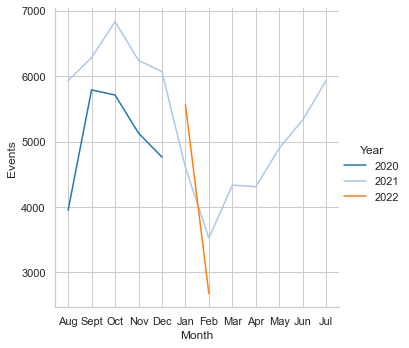

In [50]:
sns.set_theme(style="whitegrid")
#sns.relplot(x="Month", y="Events", hue="Year",
            #units="subject", estimator=None,
            #kind="line", data=df("event == 'stim'"));
fig1=sns.relplot(x="Month", y="Events", hue="Year",
            palette="tab20", linewidth=1.5,
            kind="line", data=df_ida_mes);

#Nota aclaratoria (Disclaimer): esta grafica se muestra apartir de agosto de 2020 por que la base de datos está apartir de esa fecha, para ver
#desde enero, cargue mas datos por favor.

In [21]:
#fig1.savefig("fig1.svg")

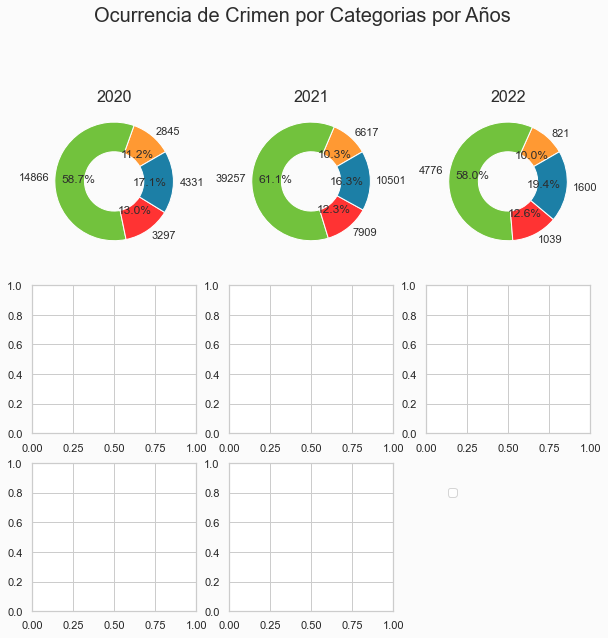

In [53]:
#Font and Colores        
font_color = '#2d2d2d'
colors = ['#ff9933', '#72c23d', '#ff3333', '#1c7fa6', '#a7d5f2']
#Create a figure and subplots
        
fig2, axes = plt.subplots(3, 3, figsize=(10, 10), facecolor='#fbfbfb')
fig2.delaxes(ax= axes[2,2])


#Draw graficos de pie con legend
            
for i, (idx, row) in enumerate(df_inv.head(8).iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, 
           labels=row.values,
           autopct='%1.1f%%',
           startangle=30, 
           wedgeprops=dict(width=.5), # For donuts
           colors=colors, 
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=16, color=font_color)
    
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor=(1.3, .87), # Legend position
                        loc='upper left',  
                        ncol=1, 
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, color=font_color) # Legend font color

fig2.subplots_adjust(wspace=.2) # Space between charts

title = fig2.suptitle('Ocurrencia de Crimen por Categorias por Años', y=0.99, fontsize=20, color=font_color)
# To prevent the title from being cropped
plt.subplots_adjust(top=0.85, bottom=0.15)

#disclaimer: este codigo esta optimizado para mostrar al menos 20 años de eventos, cargue mas datos

In [45]:
#filename = '2001-2008'
#fig2.savefig(filename+'.svg')

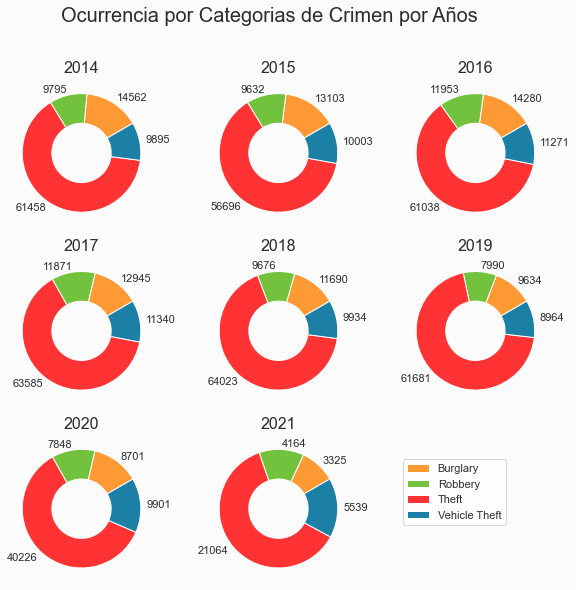

In [51]:
#Font and Colores        
font_color = '#2d2d2d'
colors = ['#ff9933', '#72c23d', '#ff3333', '#1c7fa6', '#a7d5f2']
#Create a figure and subplots
        
fig3, axes = plt.subplots(3, 3, figsize=(10, 10), facecolor='#fbfbfb')
fig3.delaxes(ax= axes[2,2])


#Draw graficos de pie con legend
            
for i, (idx, row) in enumerate(df_inv.tail(8).iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, 
           labels=row.values, 
           startangle=30, 
           wedgeprops=dict(width=.5), # For donuts
           colors=colors, 
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=16, color=font_color)
    
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor=(1.3, .87), # Legend position
                        loc='upper left',  
                        ncol=1, 
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, color=font_color) # Legend font color

fig3.subplots_adjust(wspace=.2) # Space between charts

title = fig3.suptitle('Ocurrencia por Categorias de Crimen por Años', y=.95, fontsize=20, color=font_color)
# To prevent the title from being cropped
plt.subplots_adjust(top=0.85, bottom=0.15)
#disclaimer: este codigo esta optimizado para mostrar al menos 20 años de eventos, cargue mas datos

In [52]:
#filename = '2014-2021'
#fig3.savefig(filename+'.svg')

### Grafica Stacked Bar Chart

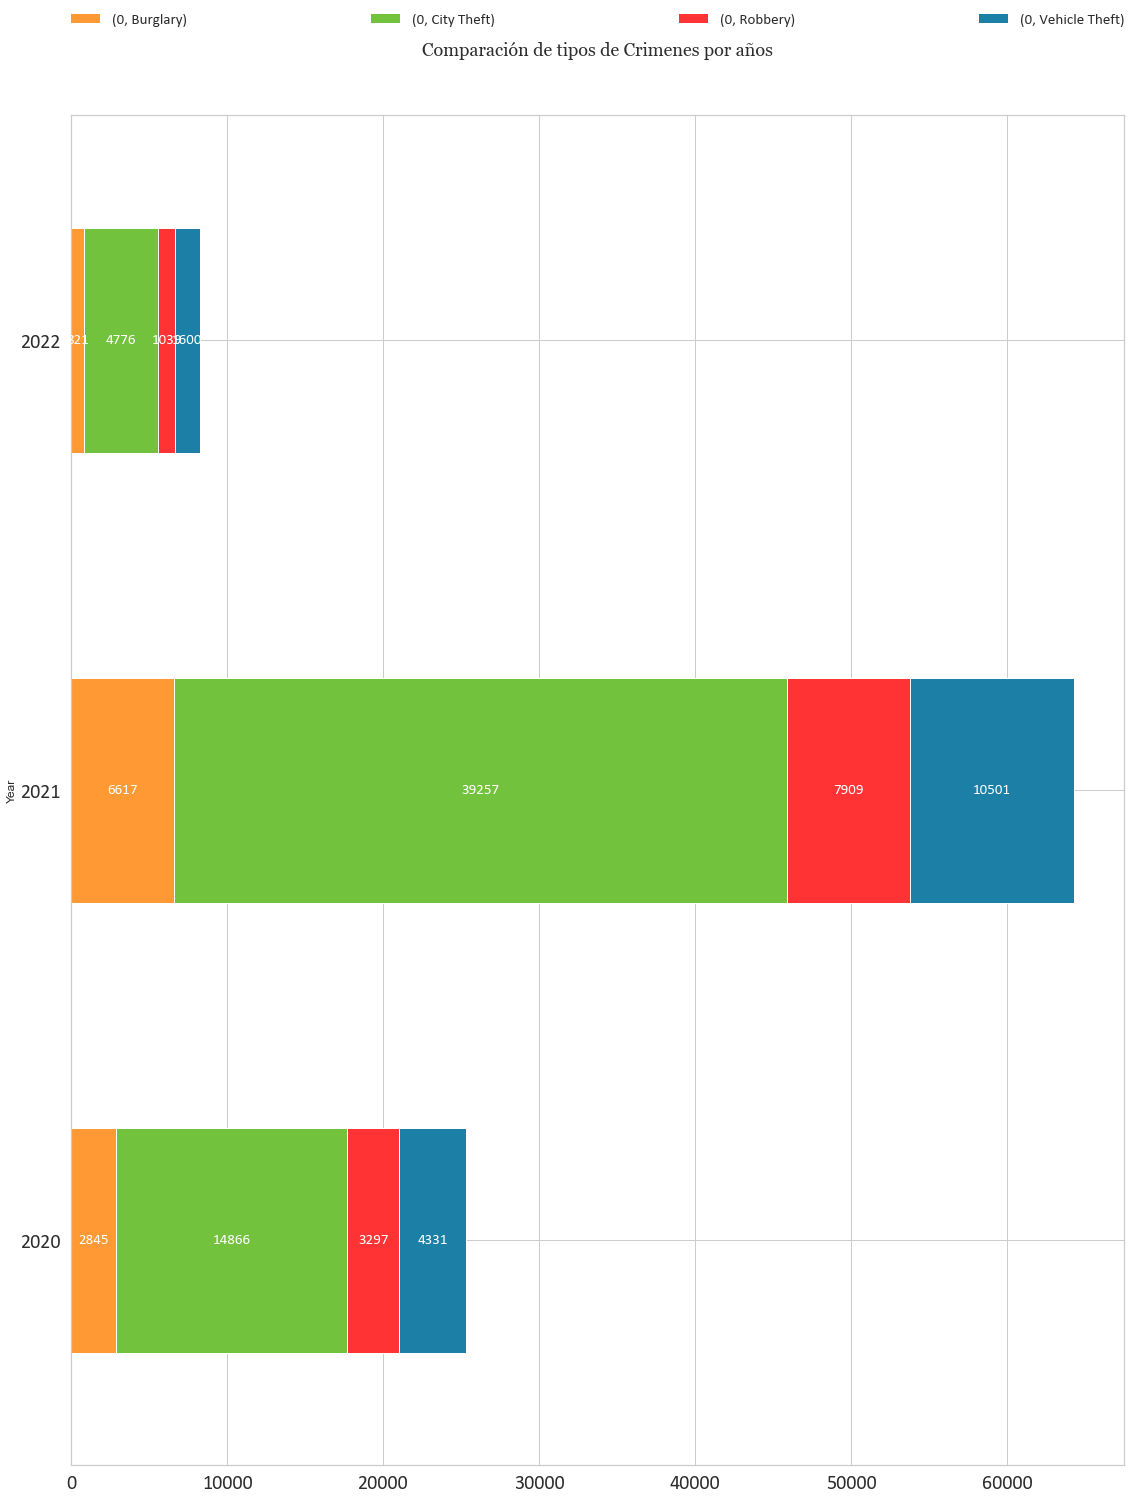

In [54]:
#preliminares colores y fuentes

font_color = '#2d2d2d'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ['#ff9933', '#72c23d', '#ff3333', '#1c7fa6']

#creando las barras

ax1 = df_inv.head(21).iloc[:, 0:4].plot.barh(align='center', stacked=True, figsize=(20, 24), color=colors)
plt.tight_layout()

#titulo

title = plt.title('Comparación de tipos de Crimenes por años', pad=60, fontsize=18, color=font_color, **csfont)
title.set_position([0.5, 1.02])



#etiquetas ’y ticks’ fonts y color
        
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(20)
plt.xticks(color=font_color, **hfont)
plt.yticks(color=font_color, **hfont)

#Create a legend 

legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0, 1.02, 1, 0.102), 
       mode='expand', 
       ncol=4, 
       borderaxespad=-0.46,
       prop={'size': 15, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color=font_color) # legend font color
    
#Create a anotations
            
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=15,
            **hfont)
    
# Adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.8, left=0.26)

In [69]:
#filename = 'barrasHanios'
#plt.savefig(filename+'.svg')

### Graficas del crimen interactivas por año

In [131]:
df_in = pd.concat([df_mod_y, tl], axis=1)
df_in = df_in.rename(columns={'Year':'year', 'Primary Type':'name', 'Events':'value', 'group':'group'})
dfg = df_in[['name', 'group', 'year', 'value']]
#dfg

In [132]:
#Colores de las grupos
colors = dict(zip(
    ["Burglary", "Robbery", "City Theft", "Vehicle Theft"],
    ["#ff9933", "#72c23d", "#ff3333", "#1c7fa6"]
))    
group_lk = dfg.set_index('name')['group'].to_dict()

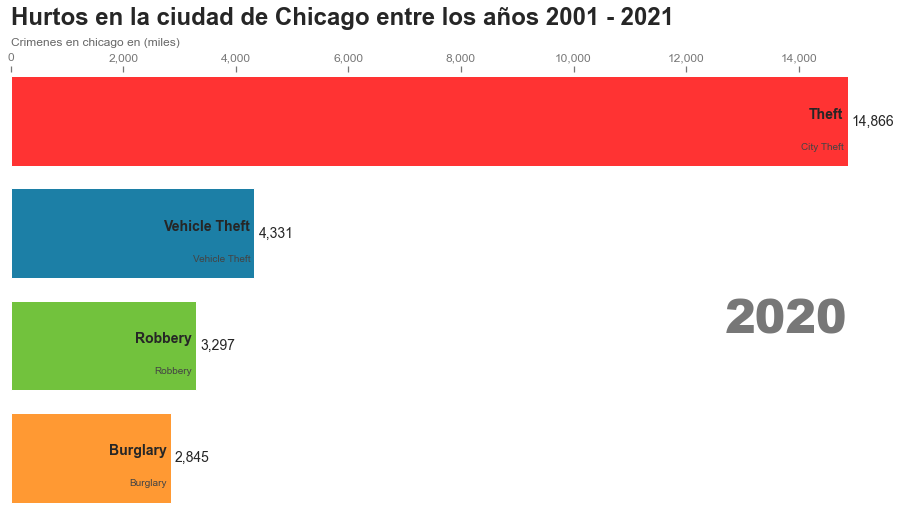

In [136]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = dfg[dfg['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(4)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Crimenes en chicago en (miles)', transform=ax.transAxes, size=12, color='#666666')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.yaxis.set_ticks('-', minor=False) #revisar, el argumento no puede ser vacio = ([]), error anterior.
    ax.margins(0, 0.01)
    ax.grid(which='minor', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Hurtos en la ciudad de Chicago entre los años 2020 - 2022',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    #ax.text(1, 0, 'by ; credit ', transform=ax.transAxes, color='#ffffff', ha='right',
            #bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2020)

#Cargar mas datos lo convierte en un ciclo mas interesante

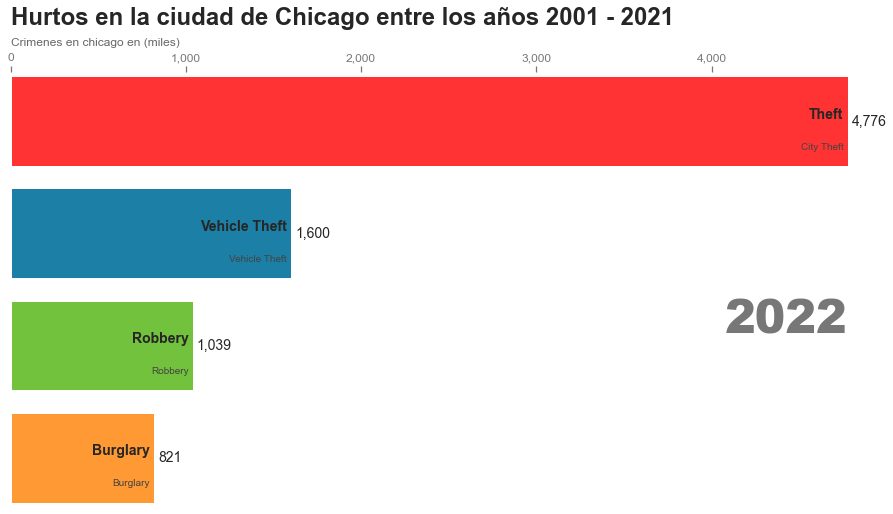

In [140]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2020, 2023))
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save()

## Nubes de Palabras

Descripcion de los tipos de hurto mas frecuente

In [110]:
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords = ['nan', 'NaN', 'Nan', 'NAN'] + list(STOPWORDS)

In [111]:
values = df_ida['Location Description'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '

In [112]:
text = """...""" # your text

text.split()
count = {}
for word in text.split():
	count.setdefault(word, 0)
	count[word] += 1

list_count = list(count.items())
list_count.sort(key=lambda i: i[1], reverse=True)
for i in list_count:
    print(i[0], ':', i[1])

... : 1


In [113]:
facecolor = 'white'

wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopwords,
            min_font_size=10).generate(comment_words)

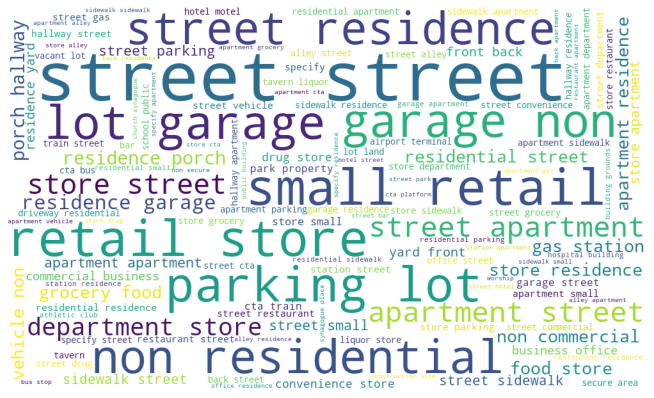

In [114]:
plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)

In [115]:
#filename = 'wordcloud1'
#plt.savefig(filename+'.png', facecolor=facecolor)

<Figure size 432x288 with 0 Axes>